# **# Import Python Packages**



In [ ]:
##########################################################
# 1. IMPORT ALL PACKAGES
##########################################################
import pandas as pd
from sklearn.metrics import confusion_matrix
import math
from collections import Counter
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn import svm
import nltk
nltk.download("stopwords"); # Filtering (Stopword Removal)
from nltk.corpus import stopwords
from sklearn.tree import export_graphviz
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import multilabel_confusion_matrix
from statistics import mean
import joblib


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# calculate execution time
import time
start_time = time.time()

In [ ]:
#PACKAGE UNTUK CONNECT G-DRIVE N G-COLLAB
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##########################################################
# 2. LOAD TESTING AND TRAINING DATASET
# header 0 means the first row is name of the coloumn
##########################################################
dateset_train =("/content/Dataset_Training.csv")
dateset_test = ("/content/Dataset_Testing.csv")

df_train = pd.read_csv(dateset_train, sep=';')
df_test = pd.read_csv(dateset_test, sep=';')

df_train = df_train.dropna(subset=['comment']) # Drop rows if missing values
df_test = df_test.dropna(subset=['comment']) # Drop rows if missing values

# Check all classes/labels in training data
all_label = set(df_train['label'].tolist())

# Data distribution for each label
dst_train = Counter(df_train['label'])

# View sample data
df_train

,comment,label
0,maudy tapi nikahnya ama jesemantap mbak,0
1,yang suka filing in the blanks,0
2,mantap semuanya harvard university stanford un...,0
3,ok teng kiu gu veri gut,0
4,wanita terhebat inspirasi para pemuda indonesia,0
...,...,...
5995,jijik liatnya suer deh mince,1
5996,anjing ngamuk hidup dmana pny musuh kliatan mn...,1
5997,cuman jual goyangan yak suara taik,1
5998,anjir tontonan bermutu,1


In [ ]:
# Function to remove punctuations
import string
import re
def remove_punctuations(text):
  for sym_punc in string.punctuation:
    text = text.replace(sym_punc, ' ')
    text = re.sub(' +', ' ', text) # replace multiple spaces with single space
  return text;

# Function to remove duplicate characters
def remove_duplicate_chars(text):
  pattern = r'(.)\1+' # (.) any character repeated (\+) more than
  repl = r'\1'        # replace it once
  text = re.sub(pattern, repl, text);
  return text;

In [ ]:

##########################################################
# 3. SAVE CORPUS DATA AS A FILE
##########################################################

# load corpus data / kumpulan teks / dictionary (corpus data is used to generate a dictionary)
corpus_data = df_train.append(df_test) # from testing and training data
corpus = corpus_data['comment'].to_numpy()

# 2-gram
# model_vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
# X2 = model_vectorizer2.fit_transform(corpus)
# model_vectorizer2.get_feature_names()

# 1-gram
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(2, 2))
vectorizer.fit(corpus)

# Printing the identified Unique words along with their indices
print("Vocabulary: ", vectorizer.vocabulary_)

# saving python object as pkl (vocabulary)
joblib.dump(vectorizer, "/content/drive/MyDrive/Skripsi/vectorizer_bull.pkl")



<ipython-input-6-c431892c0389>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corpus_data = df_train.append(df_test) # from testing and training data


Vocabulary:  {'maudy tapi': 30709, 'tapi nikahnya': 47697, 'nikahnya ama': 35263, 'ama jesemantap': 1980, 'jesemantap mbak': 21371, 'yang suka': 52060, 'suka filing': 46504, 'filing in': 15350, 'in the': 19432, 'the blanks': 48816, 'mantap semuanya': 29834, 'semuanya harvard': 43946, 'harvard university': 17838, 'university stanford': 50421, 'stanford university': 46048, 'ok teng': 36545, 'teng kiu': 48019, 'kiu gu': 25307, 'gu veri': 16628, 'veri gut': 50834, 'wanita terhebat': 51278, 'terhebat inspirasi': 48251, 'inspirasi para': 19801, 'para pemuda': 38053, 'pemuda indonesia': 38500, 'yang dari': 51826, 'dari tiktok': 11975, 'tiktok mari': 49020, 'mari kita': 29986, 'kita kumpul': 25240, 'suka daei': 46488, 'daei mbak': 11488, 'mbak najwa': 30763, 'najwa tu': 33553, 'keren wanita': 24689, 'wanita hebat': 51263, 'hebat love': 18431, 'love maudy': 28408, 'selalu suka': 43393, 'suka sama': 46594, 'sama content': 41868, 'content mba': 11151, 'mba nana': 30749, 'liat kak': 27777, 'kak ma

['/content/drive/MyDrive/Skripsi/vectorizer_bull.pkl']

In [ ]:
##########################################################
# 4. FEATURE EXTRACTION TECHNIQUES
##########################################################
## load object vectorizer (vocabulary)
#vectorizer = joblib.load("/content/drive/MyDrive/RESEARCH PAPER/# 2 Sentiment Prediction/data test train/vectorizer_all.pkl")
#
## Printing the identified Unique words along with their indices
#print("Vocabulary: ", vectorizer.vocabulary_)


In [ ]:
# Generate feature [test and train] from dictionary
# Testing data
test_data = vectorizer.transform(df_test['comment']).toarray()
feature_test = pd.DataFrame(data = test_data, columns = vectorizer.get_feature_names_out())
#df_test.to_csv('d:/test_data.csv', encoding='utf-8', index=False)

# training data
train_data = vectorizer.transform(df_train['comment']).toarray()
feature_train = pd.DataFrame(data = train_data, columns = vectorizer.get_feature_names_out())

feature_test

,abad kasihan,abad masehi,abad partai,abai orang,abai twit,abal abal,abal ngeoahahaha,abang akhirx,abang alah,abang aman,...,zara dong,zayn idrus,zhong chenle,zina lewat,zodeqir hukumnya,zolim dari,zon hak,zon kampang,zos teruskan,zumi lisa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
##########################################################
# 5. ADD CLASS TO TESTING AND TRAINING DATA
##########################################################
# ['POSITIF','NEGATIF', 'NETRAL'], [0, 1, 2]

# train
class_train = df_train['label'];
feature_train['label'] = class_train



In [ ]:
# test
class_test = df_test['label'];
feature_test['label'] = class_test



In [ ]:
feature_test = feature_test.dropna() # Drop rows if missing values


In [ ]:
feature_train = feature_train.dropna() # Drop rows if missing values


In [ ]:
feature_test

,abad kasihan,abad masehi,abad partai,abai orang,abai twit,abal abal,abal ngeoahahaha,abang akhirx,abang alah,abang aman,...,zayn idrus,zhong chenle,zina lewat,zodeqir hukumnya,zolim dari,zon hak,zon kampang,zos teruskan,zumi lisa,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
feature_train


,abad kasihan,abad masehi,abad partai,abai orang,abai twit,abal abal,abal ngeoahahaha,abang akhirx,abang alah,abang aman,...,zayn idrus,zhong chenle,zina lewat,zodeqir hukumnya,zolim dari,zon hak,zon kampang,zos teruskan,zumi lisa,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
##########################################################
# 6. HANDLE IMBALANCED DATA
##########################################################

In [ ]:
##########################################################
# 7. DEFINE X AND Y VARIABLES
##########################################################
# Testing data
x_test = feature_test.iloc[:, :-1]
y_test = feature_test['label'].tolist()

# Training data
x_train = feature_train.iloc[:, :-1]
y_train = feature_train['label'].tolist()

# Print shape of the Datasets
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (6000, 52452)
6000 train samples
2000 test samples


In [ ]:

##########################################################
# 8. TRAIN ALGORITHM
##########################################################
# Create a perceptron object with the parameters over the data
model_clf = Perceptron(max_iter=10, eta0=0.3, random_state=0)

#model_clf = svm.LinearSVC()


# Use calibrated classifier to recieve prob_score
from sklearn.calibration import CalibratedClassifierCV
model_clf = CalibratedClassifierCV(model_clf, method='isotonic')

# Train the Perceptron algorithm
model_clf.fit(x_train, y_train)

CalibratedClassifierCV(estimator=Perceptron(eta0=0.3, max_iter=10),
                       method='isotonic')

In [ ]:

##########################################################
# 9. SAVE MODEL
##########################################################
import pickle
# save the model to disk
filename = '/content/drive/MyDrive/Skripsi/predcyberbullying.model'
pickle.dump(model_clf, open(filename, 'wb'))


In [ ]:
##########################################################
# 10. APPLY THE TRAINED LEARNER TO TEST NEW DATA
##########################################################
# Apply the trained perceptron to make prediction of test data
y_pred = model_clf.predict(x_test)
#y_pred_proba = model_clf.predict_proba(x_test); # predict probability for all target labels


##########################################################
# 11. CONFUSION MATRIX
##########################################################
# Actual and predicted classes
lst_actual_class = y_test
lst_predicted_class = y_pred

# label ['POSITIF', 'NETRAL','NEGATIF'], [0, 1, 2]
lst_classes = [0, 1]

# Compute binary-class confusion matrix
tn, fp, fn, tp = confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes).ravel()

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp + fp), 3)
fscore = round((2 * ((precision * sensitivity) / (precision + sensitivity))), 3)
mcc = round((((tp * tn)-(fp * fn))/ math.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))),3)

print("TP={0}, FP={1}, TN={2}, FN={3}".format(tp, fp, tn, fn));
print("Sensitivity: {0}".format(sensitivity));
print("Specificity: {0}".format(specificity));
print("Accuracy: {0}".format(accuracy));
print("Balanced Accuracy: {0}".format(balanced_accuracy));
print("Precision: {0}".format(precision));
print("F1-Score: {0}".format(fscore))
print("MCC: {0}\n".format(mcc))


TP=905, FP=224, TN=776, FN=95
Sensitivity: 0.905
Specificity: 0.776
Accuracy: 0.84
Balanced Accuracy: 0.84
Precision: 0.802
F1-Score: 0.85
MCC: 0.687



In [ ]:
pred_proba = model_clf.predict_proba(x_test)
pred_proba

array([[0.14432758, 0.85567242],
       [0.68775115, 0.31224885],
       [0.11881015, 0.88118985],
       ...,
       [0.99184704, 0.00815296],
       [1.        , 0.        ],
       [0.89339853, 0.10660147]])

In [ ]:
print("Time taken to run: %s seconds." % (time.time() - start_time))

Time taken to run: 107.34310412406921 seconds.


In [ ]:
cf_matrix = confusion_matrix(lst_actual_class, lst_predicted_class,labels=lst_classes)

In [ ]:
cf_matrix

array([[776, 224],
       [ 95, 905]])

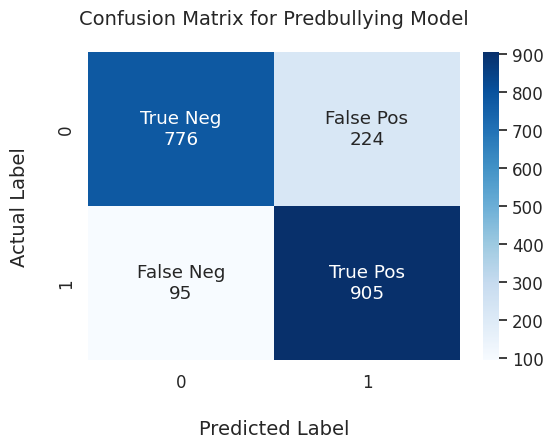

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Change figure size and increase dpi for better resolution
plt.figure(figsize=(6,4), dpi=100)
# Scale up the size of all text
sns.set(font_scale = 1.1)

# Plot Confusion Matrix using Seaborn heatmap()
# Parameters:
# first param - confusion matrix in array format
# annot = True: show the numbers in each heatmap cell
# fmt = 'd': show numbers as integers.
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
#group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

# set x-axis label and ticks.
ax.set_xlabel("Predicted Label", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['0', '1'])

# set y-axis label and ticks
ax.set_ylabel("Actual Label", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['0', '1'])

# set plot title
ax.set_title("Confusion Matrix for Predbullying Model", fontsize=14, pad=20)

plt.show()

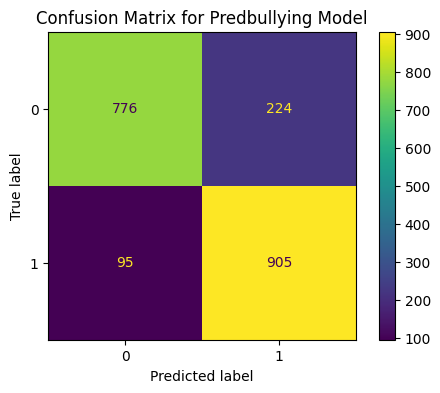

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cf_matrix, display_labels=lst_classes)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for Predbullying Model')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);